In [281]:
#Packages##
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
import scipy, pylab
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
from pandas import Series, DataFrame
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
%matplotlib inline
import seaborn; seaborn.set()

In [282]:
##Read Data##
virus_19 = pd.read_csv('COVID-19-geographic-disbtribution-worldwide-2020-03-22.csv', header=0)
virus_19.head()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId
0,3/22/20,22,3,2020,0,0,Afghanistan,AF
1,3/21/20,21,3,2020,2,0,Afghanistan,AF
2,3/20/20,20,3,2020,0,0,Afghanistan,AF
3,3/19/20,19,3,2020,0,0,Afghanistan,AF
4,3/18/20,18,3,2020,1,0,Afghanistan,AF


In [283]:
virus_19 = virus_19.drop(["Day", "Month", "Year"], axis=1)
virus_19.head()

,DateRep,Cases,Deaths,Countries and territories,GeoId
0,3/22/20,0,0,Afghanistan,AF
1,3/21/20,2,0,Afghanistan,AF
2,3/20/20,0,0,Afghanistan,AF
3,3/19/20,0,0,Afghanistan,AF
4,3/18/20,1,0,Afghanistan,AF


In [284]:
virus_19 = virus_19.rename(columns={"Countries and territories": "Countries"})
virus_19.head()

,DateRep,Cases,Deaths,Countries,GeoId
0,3/22/20,0,0,Afghanistan,AF
1,3/21/20,2,0,Afghanistan,AF
2,3/20/20,0,0,Afghanistan,AF
3,3/19/20,0,0,Afghanistan,AF
4,3/18/20,1,0,Afghanistan,AF


In [285]:
##Italy
China_virus_19=virus_19.query('Countries=="China"')
China_virus_19

,DateRep,Cases,Deaths,Countries,GeoId
1185,3/22/20,83,6,China,CN
1186,3/21/20,79,7,China,CN
1187,3/20/20,99,4,China,CN
1188,3/19/20,75,8,China,CN
1189,3/18/20,33,16,China,CN
...,...,...,...,...,...
1263,1/4/20,0,0,China,CN
1264,1/3/20,17,0,China,CN
1265,1/2/20,0,0,China,CN
1266,1/1/20,0,0,China,CN


In [286]:
#Review the Distribution data Cases Confirmed vrs Deaths | Show Detail##
China_virus_19.describe()

,Cases,Deaths
count,83.000000,83.000000
mean,981.915663,39.361446
std,1947.119587,48.021230
min,0.000000,0.000000
25%,21.000000,1.000000
50%,140.000000,23.000000
75%,1745.000000,61.000000
max,15141.000000,254.000000


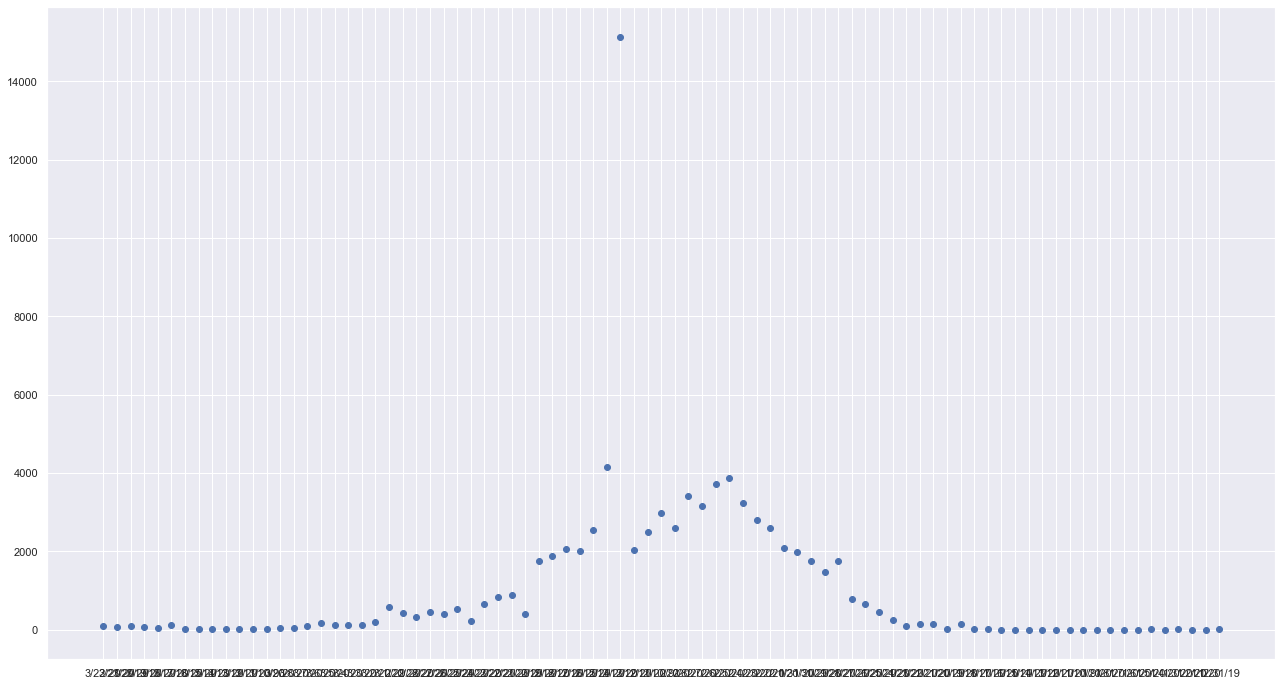

In [287]:
#Exploring Data##
fig, axes = plt.subplots(figsize=(22,12))
x = China_virus_19['DateRep']
y = China_virus_19['Cases']
plt.scatter(x,y)
plt.show()

In [288]:
virus_total=pd.pivot_table(data=China_virus_19, index='Countries', values=('Cases', 'Deaths'), aggfunc='sum')
virus_total

,Cases,Deaths
Countries,,
China,81499,3267


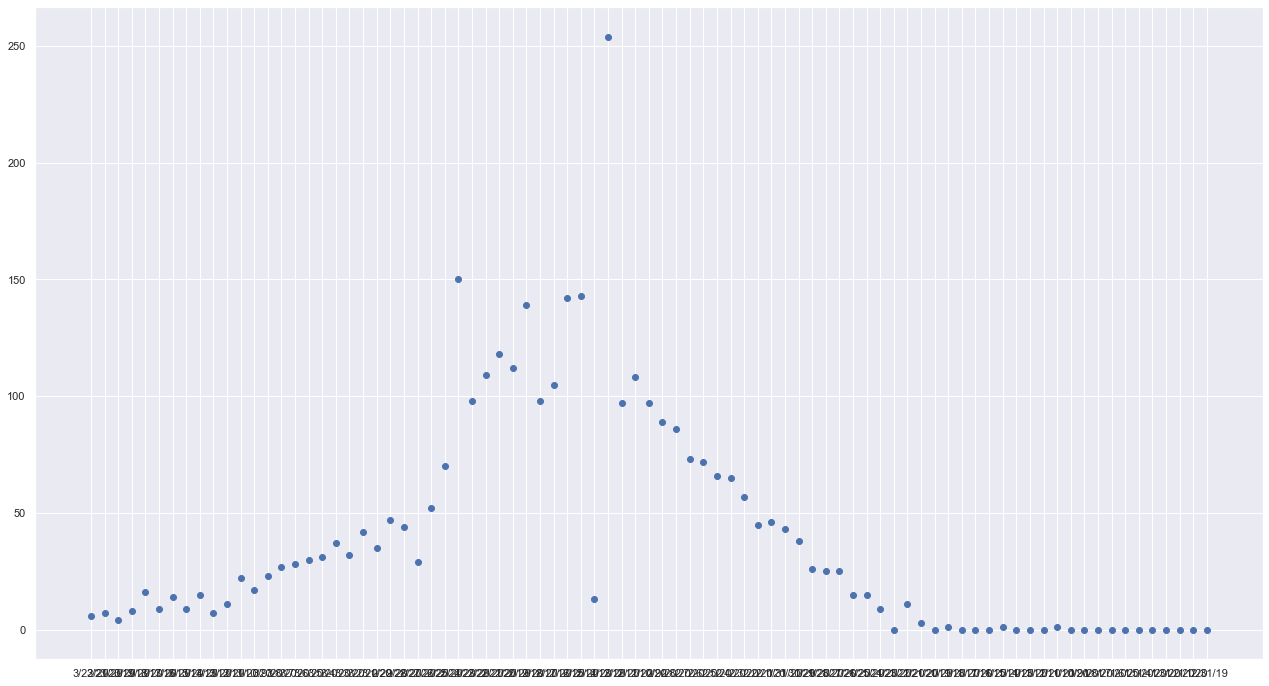

In [289]:
#Exploring Data##
fig, axes = plt.subplots(figsize=(22,12))
x = China_virus_19['DateRep']
y = China_virus_19['Deaths']
plt.scatter(x,y)
plt.show()

In [290]:
##*****TIme Series***##
# Validate Nule Data#
China_virus_19.loc[China_virus_19['Cases'].isnull()]
# Review odd data : 
China_virus_19[China_virus_19['Cases'].isin([np.nan, np.inf, -np.inf])]
China_virus_19[China_virus_19['Deaths'].isin([np.nan, np.inf, -np.inf])]
# To convert Date to datetime :
China_virus_19['DateRep'] = China_virus_19['DateRep'].astype('datetime64[ns]')
# Replace Nan Data
China_virus_19['Cases'] = China_virus_19['Cases'].fillna(0)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [291]:
China_virus_19.index = China_virus_19.DateRep
China_virus_19 = China_virus_19.resample('D').mean()

In [292]:
# esto funcionará para rangos de fecha:
China_virus_19['2019-12-31':'2020-03-15']
# esto funcionará ver datos en un año dado:
China_virus_19['2020']

,Cases,Deaths
DateRep,,
2020-01-01,0,0
2020-01-02,0,0
2020-01-03,17,0
2020-01-04,0,0
2020-01-05,15,0
...,...,...
2020-03-18,33,16
2020-03-19,75,8
2020-03-20,99,4


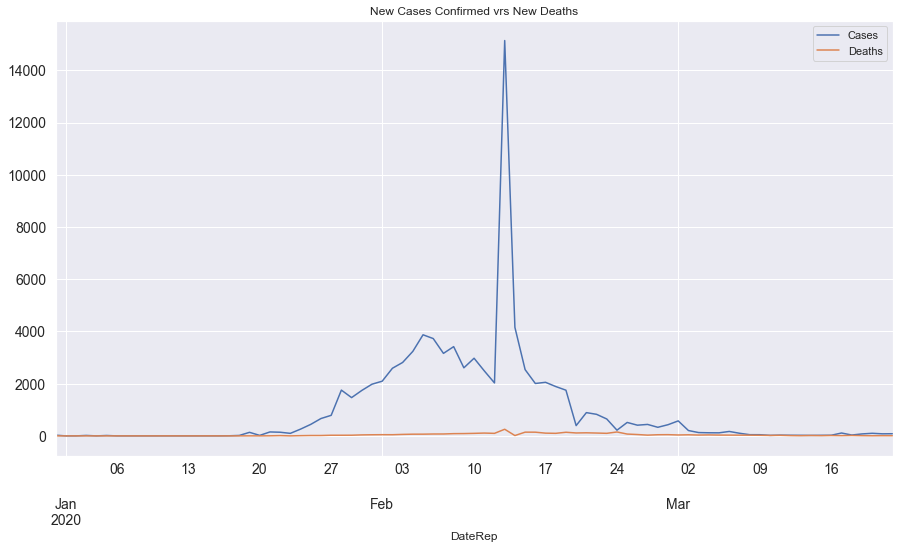

In [293]:
China_virus_19.plot(figsize=(15,8), title= 'New Cases Confirmed vrs New Deaths', fontsize=14)
plt.show()

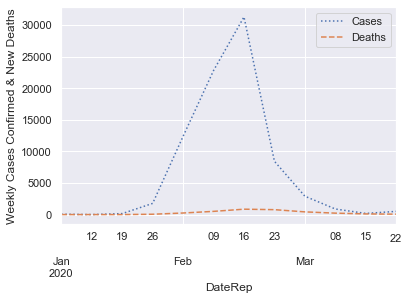

In [294]:
###Resample
weekly = China_virus_19.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly Cases Confirmed & New Deaths');

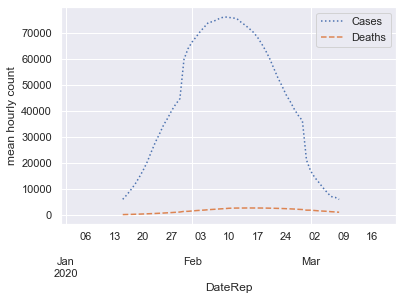

In [295]:
daily = China_virus_19.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

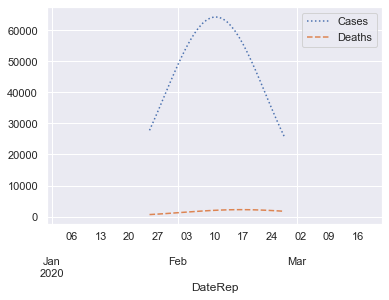

In [296]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

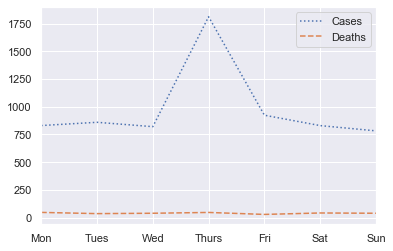

In [297]:
by_weekday = China_virus_19.groupby(Italy_virus_19.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

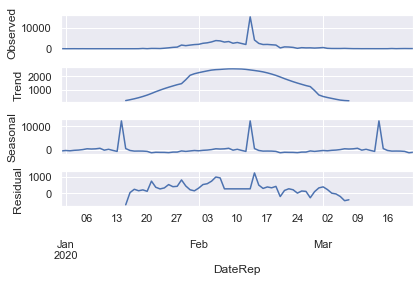

In [298]:
# Ejemplo de descomposición de serie de tiempo
descomposicion = sm.tsa.seasonal_decompose(China_virus_19['Cases'],
model='additive', freq=30)  
fig = descomposicion.plot()

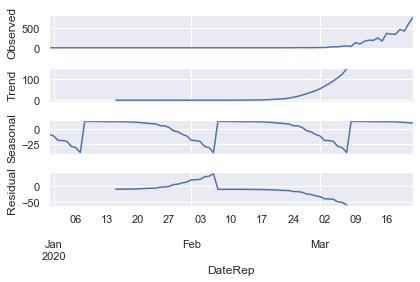

In [299]:
# Ejemplo de descomposición de serie de tiempo
descomposicion = sm.tsa.seasonal_decompose(Italy_virus_19['Deaths'],
model='additive', freq=30)  
fig = descomposicion.plot()

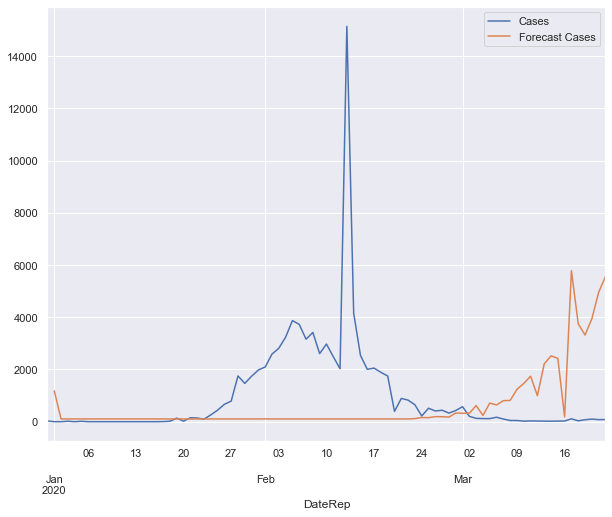

In [300]:
## Modelo ARIMA sobre el valor de cierre de la acción.
modelo = sm.tsa.ARIMA(Italy_virus_19['Cases'].iloc[1:], order=(1, 0, 0))  
resultados = modelo.fit(disp=-1)  
China_virus_19['Forecast Cases'] = resultados.fittedvalues  
plot = China_virus_19[['Cases', 'Forecast Cases']].plot(figsize=(10, 8)) 

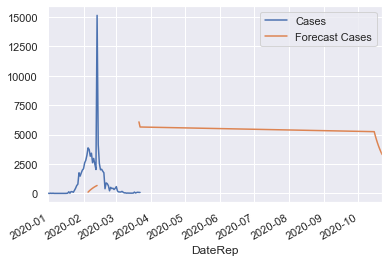

In [301]:
future=China_virus_19
future=future.reset_index()
mon=future["DateRep"]
mon=mon+pd.DateOffset(months=7)
future_dates = mon[-7-1:]
future = future.set_index('DateRep')
newDf = pd.DataFrame(index=future_dates, columns=future.columns)
future = pd.concat([future,newDf])
future["Forecast Cases"]= resultados.predict(start=35, end =43, dynamic=True)
future["Forecast Cases"].iloc[-10:]=resultados.forecast(steps=10)[0]
future[['Cases','Forecast Cases']].plot()

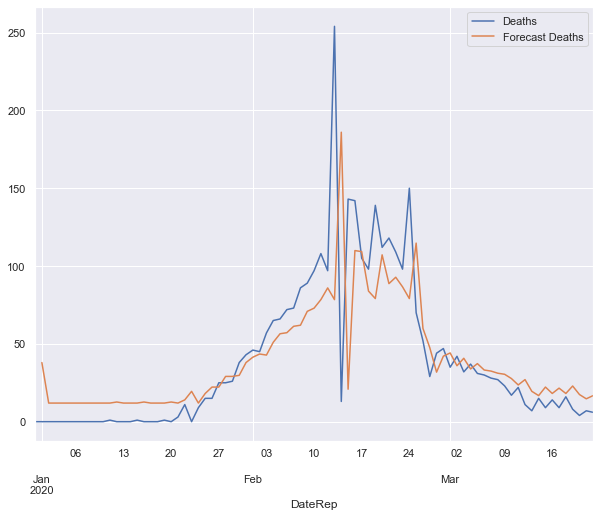

In [302]:
## Modelo ARIMA sobre el valor de cierre de la acción.
modelo_2 = sm.tsa.ARIMA(China_virus_19['Deaths'].iloc[1:], order=(1, 0, 0))  
resultados_2 = modelo_2.fit(disp=-1)  
China_virus_19['Forecast Deaths'] = resultados_2.fittedvalues  
plot = China_virus_19[['Deaths', 'Forecast Deaths']].plot(figsize=(10, 8)) 

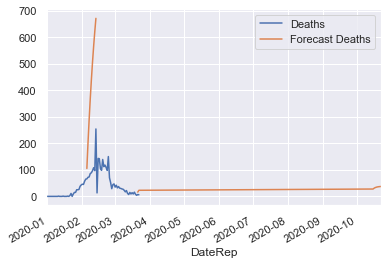

In [303]:
future_2=China_virus_19
future_2=future_2.reset_index()
mon=future_2["DateRep"]
mon=mon+pd.DateOffset(months=7)
future_dates_2 = mon[-7-1:]
future_2 = future_2.set_index('DateRep')
newDf_2 = pd.DataFrame(index=future_dates_2, columns=future_2.columns)
future_2 = pd.concat([future_2,newDf_2])
future_2["Forecast Deaths"]= resultados.predict(start=35, end =43, dynamic=True)
future_2["Forecast Deaths"].iloc[-10:]=resultados_2.forecast(steps=10)[0]
future_2[['Deaths','Forecast Deaths']].plot()

In [304]:
# Cases calculando el porcentaje de variación del día.
Daily_var = China_virus_19['Cases'] / China_virus_19['Cases'].shift(1) - 1
China_virus_19['daily_var'] = Daily_var
China_virus_19['daily_var'][:5]

DateRep
2019-12-31    NaN
2020-01-01   -1.0
2020-01-02    NaN
2020-01-03    inf
2020-01-04   -1.0
Freq: D, Name: daily_var, dtype: float64

In [305]:
# Cases mismo resultado utilizando pct_change()
China_virus_19['Cases'].pct_change()[:5]

DateRep
2019-12-31    NaN
2020-01-01   -1.0
2020-01-02    NaN
2020-01-03    inf
2020-01-04   -1.0
Freq: D, Name: Cases, dtype: float64

In [306]:
# Cases calculando rendimiento acumulado diario
daily_inc = (1 + China_virus_19['Cases'].pct_change()).cumprod()
China_virus_19['inc_daily'] = daily_inc
China_virus_19['inc_daily'][:5]

DateRep
2019-12-31    NaN
2020-01-01    0.0
2020-01-02    NaN
2020-01-03    NaN
2020-01-04    NaN
Freq: D, Name: inc_daily, dtype: float64

In [307]:
# Cases Aplicando el filtro Hodrick-Prescott para separar en tendencia y 
# componente ciclico.
China_virus_19_ciclo, China_virus_19_tend = sm.tsa.filters.hpfilter(China_virus_19['Cases'])
China_virus_19['tend'] = China_virus_19_tend

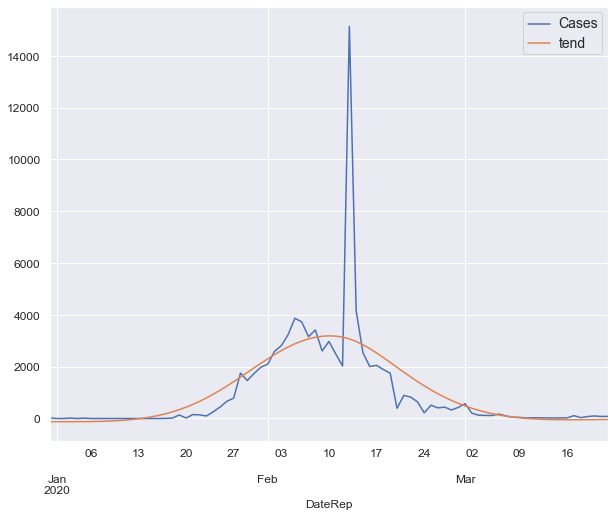

In [308]:
# Cases graficando la variacion de los casos reales con la tendencia.
China_virus_19[['Cases', 'tend']].plot(figsize=(10, 8), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);

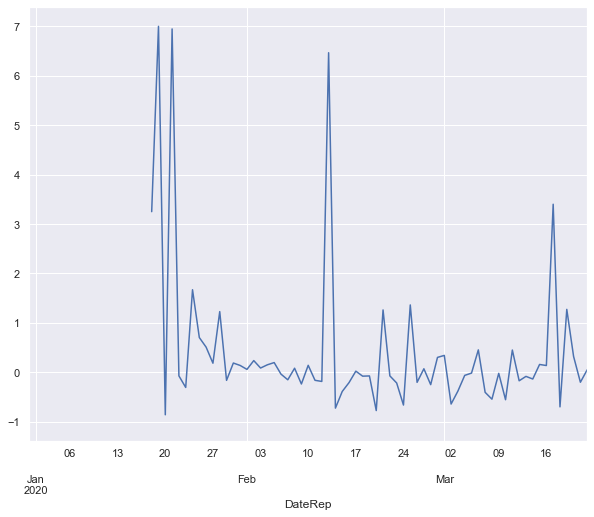

In [309]:
# Cases graficando rendimiento diario
plot = China_virus_19['daily_var'].plot(figsize=(10, 8))

In [310]:
# Deaths calculando el porcentaje de variación del día.
Daily_var_2 = China_virus_19['Deaths'] / China_virus_19['Deaths'].shift(1) - 1
China_virus_19['Daily_var_2'] = Daily_var_2
China_virus_19['Daily_var_2'][:5]

DateRep
2019-12-31   NaN
2020-01-01   NaN
2020-01-02   NaN
2020-01-03   NaN
2020-01-04   NaN
Freq: D, Name: Daily_var_2, dtype: float64

In [311]:
# Deaths mismo resultado utilizando pct_change()
China_virus_19['Deaths'].pct_change()[:5]

DateRep
2019-12-31   NaN
2020-01-01   NaN
2020-01-02   NaN
2020-01-03   NaN
2020-01-04   NaN
Freq: D, Name: Deaths, dtype: float64

In [312]:
# Deaths calculando rendimiento acumulado diario
daily_inc_2 = (1 + China_virus_19['Deaths'].pct_change()).cumprod()
China_virus_19['inc_daily Deaths'] = daily_inc_2
China_virus_19['inc_daily Deaths'][:5]

DateRep
2019-12-31   NaN
2020-01-01   NaN
2020-01-02   NaN
2020-01-03   NaN
2020-01-04   NaN
Freq: D, Name: inc_daily Deaths, dtype: float64

In [313]:
# Deaths Aplicando el filtro Hodrick-Prescott para separar en tendencia y 
# componente ciclico.
China_virus_19_ciclo_2, China_virus_19_tend_2 = sm.tsa.filters.hpfilter(China_virus_19['Deaths'])
China_virus_19['tend Deaths'] = China_virus_19_tend_2

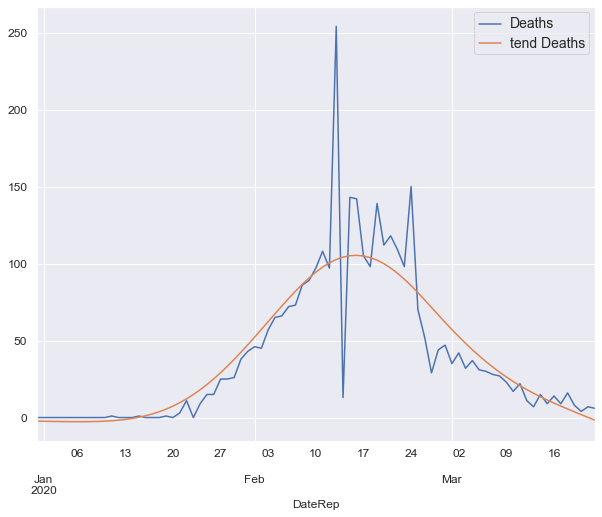

In [314]:
# Deaths graficando la variacion de los casos reales con la tendencia.
China_virus_19[['Deaths', 'tend Deaths']].plot(figsize=(10, 8), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);

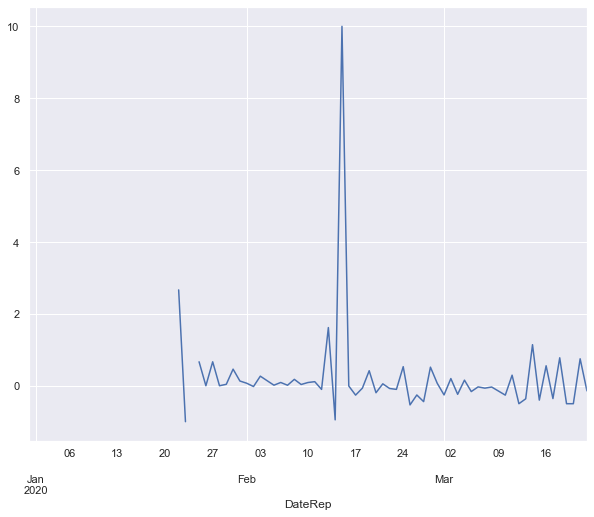

In [315]:
# Cases graficando rendimiento diario
plot_2 = China_virus_19['Daily_var_2'].plot(figsize=(10, 8))